In [10]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from io_utils import *

In [11]:
dataset_val = 0

In [12]:
if dataset_val == 0:
    dataset =  "PLAsTiCC"
    data_ob = load_PLAsTiCC_data()
    object_ids = data_ob.get_all_object_ids()
    kilonova_ids=data_ob.get_ids_of_event_type(64)
    color_band_dict = {0:'C4',1:'C2', 2:'C3', 3:'C1', 4:'k', 5:'C5'}

In [13]:
def getredshift(data_ob , object_id):
    df_meta_data = data_ob.df_metadata
    index = np.where(df_meta_data['object_id']==object_id)
    red_shift_specz = df_meta_data['hostgal_specz'][index]
    red_shift_photoz = df_meta_data['hostgal_photoz'][index]
    return red_shift_specz, red_shift_photoz

In [14]:
all_object_ids = data_ob.get_all_object_ids()
kilonova_ids=data_ob.get_ids_of_event_type(64)
print(all_object_ids)

object_id
---------
      615
      713
      730
      745
     1124
     1227
     1598
     1632
     1920
     1926
      ...
130678775
130684460
130695262
130698059
130716752
130727624
130739978
130755807
130762946
130772921
130779836
Length = 7848 rows


In [15]:
from LightCurve import LightCurve

In [16]:
flux_and_error_diff = np.abs(data_ob.df_data[data_ob.flux_col_name]) - np.abs(data_ob.df_data[data_ob.flux_err_col_name])
flux_err_ratio = np.abs(data_ob.df_data[data_ob.flux_col_name])>2*data_ob.df_data[data_ob.flux_err_col_name]
index = (np.abs(flux_and_error_diff)>10)&(flux_err_ratio)

In [17]:
def calc_transient_pausibility(event_df):
    
    if len(object_df)==0:
        pausibility = 0
        
    else:
    
        max_flux_pos = np.argmax(object_df[data_ob.flux_col_name])

        #length =len(object_df['mjd'])
        max_flux_date = object_df[data_ob.time_col_name][max_flux_pos]
        max_flux_val = object_df[data_ob.flux_col_name][max_flux_pos]
        #print(object_df['flux_err'])


        time_from_max = np.abs(object_df[data_ob.time_col_name] - max_flux_date)
        time_from_max[np.where(time_from_max<7)] = 0
        #filtered_flux = object_df['flux']
        length = np.sum(np.where(time_from_max>=0))

        #normalization = np.sum(index_greater_than_half)
        pausibility = np.sum(np.abs(object_df[data_ob.flux_col_name])*np.abs(time_from_max))/max_flux_val
        #print(pausibility)
        
    return pausibility

In [9]:
accepted_kilonovae =0
accepted_events = 0

for i, object_id in enumerate(all_object_ids):
    #print(data_ob.df_data[data_ob.object_id_col_name])
    mask = data_ob.df_data[data_ob.object_id_col_name] == object_id
    object_df = data_ob.df_data[mask&index]
    pausibility = calc_transient_pausibility(object_df)
        #print(pausibility)
        #lc = LightCurve(object_df,"mjd","flux","flux_err","passband")
        
    max_per_band = []
    for band in range(6):
        band_mask = data_ob.df_data[data_ob.band_col_name]==band
        band_df = data_ob.df_data[band_mask*mask]
        max_per_band.append(np.amax(band_df[data_ob.flux_col_name]))

    if (pausibility<1500)&(max_per_band[0]<1500)&(max_per_band[1]<11000)&(max_per_band[2]<10000)&(max_per_band[3]<8000)&(max_per_band[4]<8000)&(max_per_band[5]<8000):
        #if (pausibility<1500):
        if np.sum(kilonova_ids==object_id)==1:
            accepted_kilonovae+=1
        accepted_events = accepted_events+1
        
    else:
        if np.sum(kilonova_ids==object_id)==1:
            lc = LightCurve(data_ob.get_data_of_event(object_id), time_col_name=data_ob.time_col_name, brightness_col_name=data_ob.flux_col_name, brightness_err_col_name=data_ob.flux_err_col_name,band_col_name=data_ob.band_col_name, band_map=data_ob.band_map)
            red_shift,_ = getredshift(data_ob, object_id)
            fig=lc.plot_light_curve(color_band_dict)
            fig.suptitle("spectral redshift : "+ str(red_shift[0]), fontsize=25)
            #plt.show()
            #fig.savefig("./kilonova_curves/Wrongly_rejected/"+str(object_id)+"_failed")
            #plt.close('all')

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
print("Fraction of kilonavae events accepted : "+ str(accepted_kilonovae)+"/"+"102")
print("Fraction of all events accepted : "+ str(accepted_events)+"/"+str(len(all_object_ids)))

In [ ]:
print("Percentage of kilonavae events accepted : "+ str(100-accepted_kilonovae/102*100))
print("Percentage of all events Rejected : "+ str(100 - accepted_events/len(all_object_ids)*100))

# HISTOGRAM OF METRIC

In [ ]:
kilonovae_pausibility = []
nonkilo_pausibility = []

for i, object_id in enumerate(all_object_ids):
    
    mask = data_ob.df_data[data_ob.object_id_col_name] == object_id
    #print(mask)
    object_df = data_ob.df_data[mask*index]
    
    print(len(object_df))
    if len(object_df)==0:
        pausibility = 0
        
    else:
    
        max_flux_pos = np.argmax(object_df[data_ob.flux_col_name])

        #length =len(object_df['mjd'])
        max_flux_date = object_df[data_ob.time_col_name][max_flux_pos]
        max_flux_val = object_df[data_ob.flux_col_name][max_flux_pos]
        #print(object_df['flux_err'])


        time_from_max = np.abs(object_df[data_ob.time_col_name] - max_flux_date)
        time_from_max[np.where(time_from_max<7)] = 0
        #print(time_from_max)
        #filtered_flux = object_df['flux']
        length = np.sum(np.where(time_from_max>=0))

        #normalization = np.sum(index_greater_than_half)
        pausibility = np.sum(np.abs(object_df[data_ob.flux_col_name])*np.abs(time_from_max))/max_flux_val
        
    if np.sum(kilonova_ids==object_id)==1:
        kilonovae_pausibility.append(pausibility)

    else:
        nonkilo_pausibility.append(pausibility)

In [ ]:
print(kilonovae_pausibility)

In [ ]:
print(nonkilo_pausibility)

In [ ]:
plt.hist(np.log(np.asarray(kilonovae_pausibility)+1),bins=50,label=['kilonovae','Non-kilnovae'])

In [ ]:
plt.hist(np.log(np.asarray(nonkilo_pausibility)+1),bins=100,label=['kilonovae','Non-kilnovae'])

In [ ]:
y1 = np.log(np.asarray(kilonovae_pausibility)+1)
y2 = np.log(np.asarray(nonkilo_pausibility)+1)

In [ ]:
colors = ['b','g']

#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([y1, y2], color=colors)
n, bins, patches = ax1.hist([y1,y2],bins=50)
ax1.cla() 

#plots the histogram data
width = (bins[1] - bins[0])
bins_shifted = bins
ax1.bar(bins[:-1], n[0], width, color=colors[0],alpha = .6,label="kilonova")
ax2.bar(bins[:-1], n[1], width, color=colors[1],alpha = .6, label="non-kilonova")

#finishes the plot
ax1.set_ylabel("kilonovae Count", color=colors[0],fontsize=15)
ax2.set_ylabel("non-kilonovae Count", color=colors[1],fontsize=15)
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_xlabel("$\ln{\;(\;TP+1\;)}$",fontsize=15)
fig.savefig("distribution_of_metric")
plt.tight_layout()
plt.show()

In [31]:
y3= []
y4 = []
for object_id in object_ids:
    mask = data_ob.df_data[data_ob.object_id_col_name] == object_id
    object_df = data_ob.df_data[mask&index]
    if len(object_df)>0:
        max_time = np.amax(object_df[data_ob.time_col_name])
        min_time = max_time-365
        time_index = object_df[data_ob.time_col_name]>=min_time
        object_df = object_df[time_index]
        print("\n---------------------------------------")
        print(max_time- np.amin(object_df[data_ob.time_col_name]))
        #print(object_df[data_ob.time_col_name])
    is_tran = data_ob.is_transient(object_id)
    #print(is_tran)
    if is_tran == None: 
        print("error")
    elif is_tran==1:
        y3.append(calc_transient_pausibility(object_df))
    elif is_tran == 0:
        y4.append(calc_transient_pausibility(object_df))
    else:
        print("err")


---------------------------------------
364.17089999999735

---------------------------------------
90.80270000000019

---------------------------------------
47.90890000000218

---------------------------------------
114.68700000000536

---------------------------------------
115.7954000000027

---------------------------------------
334.94840000000113

---------------------------------------
15.188499999996566

---------------------------------------
0.0

---------------------------------------
100.85979999999836

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
39.02700000000186

---------------------------------------
131.74700000000303

---------------------------------------
0.0

---------------------------------------
353.0008000000016

---------------------------------------
100.89339999999356

---------------------------------------
130.65490000000136

---------------------------------------
56.1


---------------------------------------
73.82540000000154

---------------------------------------
285.21220000000176

---------------------------------------
312.3313000000053

---------------------------------------
11.03020000000106

---------------------------------------
364.17089999999735

---------------------------------------
74.94829999999638

---------------------------------------
32.93630000000121

---------------------------------------
100.89339999999356

---------------------------------------
51.02689999999711

---------------------------------------
355.05630000000383

---------------------------------------
124.81430000000546

---------------------------------------
65.81160000000091

---------------------------------------
108.82459999999992

---------------------------------------
355.07860000000073

---------------------------------------
88.82450000000244

---------------------------------------
89.0023000000001

---------------------------------------
364.99269


---------------------------------------
119.81699999999546

---------------------------------------
359.0196999999971

---------------------------------------
364.21070000000327

---------------------------------------
74.72490000000107

---------------------------------------
119.85409999999683

---------------------------------------
90.85540000000037

---------------------------------------
348.0491000000038

---------------------------------------
86.76450000000477

---------------------------------------
24.91820000000007

---------------------------------------
42.11039999999775

---------------------------------------
0.03740000000107102

---------------------------------------
348.98999999999796

---------------------------------------
100.8686000000016

---------------------------------------
2.985000000000582

---------------------------------------
45.75600000000122

---------------------------------------
0.0

---------------------------------------
86.86279999999533

----


---------------------------------------
106.69570000000385

---------------------------------------
44.18819999999687

---------------------------------------
26.968000000000757

---------------------------------------
346.0506999999998

---------------------------------------
3.0397999999986496

---------------------------------------
364.99269999999524

---------------------------------------
103.78639999999723

---------------------------------------
112.81179999999586

---------------------------------------
0.03709999999409774

---------------------------------------
0.021999999997206032

---------------------------------------
38.20089999999618

---------------------------------------
86.87369999999646

---------------------------------------
0.0

---------------------------------------
57.81739999999991

---------------------------------------
0.0

---------------------------------------
33.965799999998126

---------------------------------------
50.8747000000003

-------------


---------------------------------------
28.848900000004505

---------------------------------------
119.78820000000269

---------------------------------------
0.0

---------------------------------------
330.21190000000206

---------------------------------------
28.726299999994808

---------------------------------------
63.81090000000404

---------------------------------------
0.0

---------------------------------------
346.1536999999953

---------------------------------------
0.0

---------------------------------------
28.970900000000256

---------------------------------------
56.93110000000161

---------------------------------------
75.81039999999484

---------------------------------------
343.1345999999976

---------------------------------------
3.0239000000001397

---------------------------------------
40.898300000000745

---------------------------------------
353.2595000000001

---------------------------------------
339.2199000000037

-------------------------------


---------------------------------------
0.0

---------------------------------------
27.793499999999767

---------------------------------------
119.81699999999546

---------------------------------------
119.83890000000247

---------------------------------------
0.0

---------------------------------------
100.89339999999356

---------------------------------------
133.9484999999986

---------------------------------------
0.0

---------------------------------------
112.99270000000251

---------------------------------------
362.0278000000035

---------------------------------------
5.035100000000966

---------------------------------------
0.0

---------------------------------------
27.899800000006508

---------------------------------------
122.71790000000328

---------------------------------------
69.96410000000469

---------------------------------------
329.1748000000007

---------------------------------------
0.0

---------------------------------------
107.82300000000396



---------------------------------------
64.85399999999936

---------------------------------------
100.83689999999478

---------------------------------------
119.78820000000269

---------------------------------------
49.89390000000276

---------------------------------------
362.0387000000046

---------------------------------------
337.0749999999971

---------------------------------------
89.7448000000004

---------------------------------------
28.848900000004505

---------------------------------------
71.93449999999575

---------------------------------------
57.90389999999752

---------------------------------------
0.0

---------------------------------------
77.04359999999724

---------------------------------------
119.78820000000269

---------------------------------------
94.86770000000251

---------------------------------------
326.20990000000165

---------------------------------------
119.85310000000027

---------------------------------------
358.1666000000041

-----


---------------------------------------
0.007600000004458707

---------------------------------------
0.007799999999406282

---------------------------------------
340.024900000004

---------------------------------------
29.9887000000017

---------------------------------------
12.718399999997928

---------------------------------------
11.85099999999511

---------------------------------------
86.7806999999957

---------------------------------------
119.78820000000269

---------------------------------------
101.69090000000142

---------------------------------------
0.0

---------------------------------------
90.79439999999886

---------------------------------------
98.68970000000263

---------------------------------------
85.66519999999582

---------------------------------------
362.0387000000046

---------------------------------------
364.17089999999735

---------------------------------------
0.0371000000013737

---------------------------------------
359.0404000000053

--


---------------------------------------
133.9375

---------------------------------------
119.84219999999914

---------------------------------------
63.84799999999814

---------------------------------------
100.89339999999356

---------------------------------------
48.92840000000433

---------------------------------------
42.884799999999814

---------------------------------------
362.07890000000043

---------------------------------------
71.76050000000396

---------------------------------------
0.0

---------------------------------------
11.934699999997974

---------------------------------------
100.85979999999836

---------------------------------------
362.08989999999903

---------------------------------------
0.02960000000166474

---------------------------------------
45.87779999999475

---------------------------------------
16.94600000000355

---------------------------------------
0.0

---------------------------------------
77.95360000000073

------------------------


---------------------------------------
75.82410000000527

---------------------------------------
58.80880000000616

---------------------------------------
28.055899999999383

---------------------------------------
101.69090000000142

---------------------------------------
114.69509999999718

---------------------------------------
130.89719999999943

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
14.031800000004296

---------------------------------------
364.02060000000347

---------------------------------------
0.03719999999884749

---------------------------------------
364.15989999999874

---------------------------------------
364.99269999999524

---------------------------------------
0.0

---------------------------------------
363.99849999999424

---------------------------------------
327.1252999999997

---------------------------------------
3


---------------------------------------
136.62900000000081

---------------------------------------
96.7989000000016

---------------------------------------
0.0

---------------------------------------
17.971900000004098

---------------------------------------
96.81369999999879

---------------------------------------
133.9375

---------------------------------------
28.020000000004075

---------------------------------------
28.986000000004424

---------------------------------------
364.0020000000004

---------------------------------------
355.07860000000073

---------------------------------------
77.05449999999837

---------------------------------------
74.76650000000518

---------------------------------------
361.15729999999894

---------------------------------------
115.76809999999386

---------------------------------------
357.12690000000293

---------------------------------------
34.01310000000376

---------------------------------------
364.99269999999524

-----------


---------------------------------------
119.78820000000269

---------------------------------------
57.81500000000233

---------------------------------------
88.96590000000288

---------------------------------------
359.13260000000446

---------------------------------------
32.015800000001036

---------------------------------------
54.81170000000566

---------------------------------------
45.83919999999489

---------------------------------------
58.81970000000001

---------------------------------------
2.999100000000908

---------------------------------------
28.055899999999383

---------------------------------------
74.83280000000377

---------------------------------------
105.80329999999958

---------------------------------------
119.78820000000269

---------------------------------------
112.81029999999737

---------------------------------------
116.84939999999915

---------------------------------------
48.92840000000433

---------------------------------------
2.98799


---------------------------------------
311.22899999999936

---------------------------------------
77.03899999999703

---------------------------------------
133.68560000000434

---------------------------------------
119.78820000000269

---------------------------------------
132.6603000000032

---------------------------------------
364.17089999999735

---------------------------------------
106.658500000005

---------------------------------------
0.0

---------------------------------------
133.9484999999986

---------------------------------------
54.913699999997334

---------------------------------------
359.162900000003

---------------------------------------
359.28080000000045

---------------------------------------
111.62049999999726

---------------------------------------
332.89370000000054

---------------------------------------
133.9375

---------------------------------------
118.76000000000204

---------------------------------------
29.01430000000255

------------


---------------------------------------
364.8709999999992

---------------------------------------
216.6149000000005

---------------------------------------
359.9985000000015

---------------------------------------
29.90060000000085

---------------------------------------
0.0

---------------------------------------
339.04709999999614

---------------------------------------
361.9818000000014

---------------------------------------
168.64129999999568

---------------------------------------
218.6692999999941

---------------------------------------
344.03779999999824

---------------------------------------
349.96070000000327

---------------------------------------
89.84859999999753

---------------------------------------
363.9994000000006

---------------------------------------
363.9774000000034

---------------------------------------
147.6238000000012

---------------------------------------
335.01370000000315

---------------------------------------
358.0813000000053

-----


---------------------------------------
0.0

---------------------------------------
356.91300000000047

---------------------------------------
245.1301999999996

---------------------------------------
361.0028999999995

---------------------------------------
318.0028999999995

---------------------------------------
314.9650000000038

---------------------------------------
263.0784000000058

---------------------------------------
335.18819999999687

---------------------------------------
355.04709999999614

---------------------------------------
359.9933000000019

---------------------------------------
58.76350000000093

---------------------------------------
363.9450999999972

---------------------------------------
147.76979999999458

---------------------------------------
167.67799999999988

---------------------------------------
202.72850000000471

---------------------------------------
355.03020000000106

---------------------------------------
362.82770000000164

--


---------------------------------------
135.72469999999885

---------------------------------------
361.17949999999837

---------------------------------------
247.2118000000046

---------------------------------------
240.14310000000114

---------------------------------------
349.9250000000029

---------------------------------------
308.97209999999905

---------------------------------------
136.77380000000267

---------------------------------------
145.80079999999725

---------------------------------------
356.87880000000587

---------------------------------------
257.59219999999914

---------------------------------------
336.00449999999546

---------------------------------------
338.0712000000058

---------------------------------------
364.03979999999865

---------------------------------------
301.04009999999835

---------------------------------------
364.9484999999986

---------------------------------------
302.92289999999775

---------------------------------------
83.


---------------------------------------
76.8940999999977

---------------------------------------
97.76929999999993

---------------------------------------
317.13150000000314

---------------------------------------
364.032100000004

---------------------------------------
357.0171999999948

---------------------------------------
360.002800000002

---------------------------------------
21.024899999996705

---------------------------------------
330.83120000000054

---------------------------------------
129.79179999999906

---------------------------------------
357.976800000004

---------------------------------------
358.0222999999969

---------------------------------------
143.58810000000085

---------------------------------------
2.952100000002247

---------------------------------------
364.9907000000021

---------------------------------------
12.004200000003038

---------------------------------------
339.0625999999975

---------------------------------------
167.372699999


---------------------------------------
353.0512000000017

---------------------------------------
342.8986999999979

---------------------------------------
353.9791000000041

---------------------------------------
172.71689999999944

---------------------------------------
290.1689000000042

---------------------------------------
359.9037000000026

---------------------------------------
187.63999999999942

---------------------------------------
364.8974999999991

---------------------------------------
359.0345000000016

---------------------------------------
150.5873999999967

---------------------------------------
275.26170000000275

---------------------------------------
134.6606000000029

---------------------------------------
357.9933999999994

---------------------------------------
322.1366000000053

---------------------------------------
42.99619999999413

---------------------------------------
359.08290000000125

---------------------------------------
363.0300999


---------------------------------------
359.1634000000049

---------------------------------------
336.9750000000058

---------------------------------------
0.0

---------------------------------------
336.0213999999978

---------------------------------------
65.65479999999661

---------------------------------------
42.80460000000312

---------------------------------------
304.92529999999533

---------------------------------------
356.0498000000007

---------------------------------------
165.69019999999728

---------------------------------------
0.0

---------------------------------------
352.04389999999694

---------------------------------------
176.32370000000083

---------------------------------------
153.71489999999903

---------------------------------------
363.9916000000012

---------------------------------------
268.30109999999695

---------------------------------------
130.61970000000292

---------------------------------------
76.81160000000091

-----------------


---------------------------------------
242.63690000000497

---------------------------------------
363.0063000000009

---------------------------------------
341.05220000000554

---------------------------------------
300.0263999999952

---------------------------------------
363.0228999999963

---------------------------------------
330.0399000000034

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
363.99519999999757

---------------------------------------
0.0

---------------------------------------
341.01610000000073

---------------------------------------
296.0903000000035

---------------------------------------
129.61659999999392

---------------------------------------
207.65050000000338

---------------------------------------
226.64440000000468

---------------------------------------
349.071299999996

---------------------------------------
363.9539999999979

--------------------------------


---------------------------------------
357.2330000000002

---------------------------------------
309.1741000000038

---------------------------------------
353.107600000003

---------------------------------------
364.9796999999962

---------------------------------------
364.82880000000296

---------------------------------------
227.63650000000052

---------------------------------------
341.0601999999999

---------------------------------------
208.6918000000005

---------------------------------------
290.3359000000055

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
296.96800000000076

---------------------------------------
0.0

---------------------------------------
362.89800000000105

---------------------------------------
332.0195999999996

---------------------------------------
363.93730000000505

---------------------------------------
30.93329999999696

----------------------------------


---------------------------------------
162.7525999999998

---------------------------------------
81.60719999999856

---------------------------------------
326.9438000000009

---------------------------------------
362.9267999999938

---------------------------------------
355.0849999999991

---------------------------------------
85.75089999999909

---------------------------------------
363.8237000000008

---------------------------------------
90.892399999997

---------------------------------------
339.0031999999992

---------------------------------------
89.75929999999789

---------------------------------------
0.0

---------------------------------------
193.67250000000058

---------------------------------------
45.860799999994924

---------------------------------------
103.62329999999929

---------------------------------------
314.9262999999992

---------------------------------------
338.01780000000144

---------------------------------------
362.0052999999971

--------


---------------------------------------
179.73159999999916

---------------------------------------
346.03370000000723

---------------------------------------
363.8277999999991

---------------------------------------
345.0195999999996

---------------------------------------
358.1047999999937

---------------------------------------
212.63579999999638

---------------------------------------
364.85409999999683

---------------------------------------
360.99060000000463

---------------------------------------
224.64660000000003

---------------------------------------
155.66769999999815

---------------------------------------
211.59139999999752

---------------------------------------
363.79329999999754

---------------------------------------
333.0604999999996

---------------------------------------
0.0

---------------------------------------
307.28340000000026

---------------------------------------
358.98189999999886

---------------------------------------
50.94390000000567



---------------------------------------
359.0722999999998

---------------------------------------
347.10689999999886

---------------------------------------
116.79479999999603

---------------------------------------
211.62219999999797

---------------------------------------
325.0555000000022

---------------------------------------
100.74060000000463

---------------------------------------
284.13200000000506

---------------------------------------
0.0

---------------------------------------
122.62539999999717

---------------------------------------
313.9791999999943

---------------------------------------
353.8652000000002

---------------------------------------
157.41589999999997

---------------------------------------
318.04559999999765

---------------------------------------
207.64310000000114

---------------------------------------
343.0642000000007

---------------------------------------
162.59949999999662

---------------------------------------
348.0578999999998




---------------------------------------
84.74799999999959

---------------------------------------
360.01060000000143

---------------------------------------
126.81910000000062

---------------------------------------
294.06099999999424

---------------------------------------
111.8798999999999

---------------------------------------
302.1655000000028

---------------------------------------
227.65789999999834

---------------------------------------
26.889499999997497

---------------------------------------
333.14570000000094

---------------------------------------
155.36960000000545

---------------------------------------
103.8301999999967

---------------------------------------
125.68889999999374

---------------------------------------
363.08140000000276

---------------------------------------
0.0

---------------------------------------
336.96190000000206

---------------------------------------
215.65959999999905

---------------------------------------
272.08750000000146


---------------------------------------
362.04449999999633

---------------------------------------
281.2703000000038

---------------------------------------
355.0338999999949

---------------------------------------
302.2430999999997

---------------------------------------
0.0

---------------------------------------
359.97060000000056

---------------------------------------
154.76049999999668

---------------------------------------
125.81229999999778

---------------------------------------
333.0668000000005

---------------------------------------
0.0

---------------------------------------
358.971000000005

---------------------------------------
331.1432999999961

---------------------------------------
172.6108000000022

---------------------------------------
72.925900000002

---------------------------------------
165.80969999999797

---------------------------------------
115.69989999999962

---------------------------------------
326.09730000000127

--------------------


---------------------------------------
123.87000000000262

---------------------------------------
351.8457999999955

---------------------------------------
283.28510000000097

---------------------------------------
115.63269999999466

---------------------------------------
363.9340999999986

---------------------------------------
95.73470000000088

---------------------------------------
0.0

---------------------------------------
89.78280000000086

---------------------------------------
361.94050000000425

---------------------------------------
273.0097999999998

---------------------------------------
48.827799999999115

---------------------------------------
112.72650000000431

---------------------------------------
326.9285000000018

---------------------------------------
359.0778999999966

---------------------------------------
361.0630000000019

---------------------------------------
343.11729999999807

---------------------------------------
209.7013999999981

---


---------------------------------------
207.66389999999956

---------------------------------------
132.81519999999728

---------------------------------------
324.10599999999977

---------------------------------------
109.72340000000258

---------------------------------------
364.04879999999685

---------------------------------------
364.9601000000039

---------------------------------------
307.2926000000007

---------------------------------------
363.99499999999534

---------------------------------------
145.73199999999633

---------------------------------------
357.01459999999497

---------------------------------------
43.956700000002456

---------------------------------------
180.33239999999932

---------------------------------------
101.85889999999927

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
337.9858999999997

---------------------------------------
356.0803999999989

-------------


---------------------------------------
207.6362999999983

---------------------------------------
130.72520000000077

---------------------------------------
356.98910000000615

---------------------------------------
30.902200000004086

---------------------------------------
82.79899999999907

---------------------------------------
0.0

---------------------------------------
364.9783000000025

---------------------------------------
286.04619999999704

---------------------------------------
344.020199999999

---------------------------------------
190.65340000000288

---------------------------------------
76.93819999999687

---------------------------------------
52.078300000001036

---------------------------------------
0.0

---------------------------------------
353.9531999999963

---------------------------------------
43.92119999999704

---------------------------------------
362.229800000001

---------------------------------------
312.0260999999955

--------------------


---------------------------------------
270.00640000000567

---------------------------------------
96.66270000000077

---------------------------------------
323.0958000000028

---------------------------------------
280.16109999999753

---------------------------------------
361.04359999999724

---------------------------------------
138.64530000000377

---------------------------------------
359.98799999999756

---------------------------------------
0.0

---------------------------------------
93.82340000000113

---------------------------------------
300.22060000000056

---------------------------------------
274.17370000000665

---------------------------------------
0.0

---------------------------------------
116.72409999999945

---------------------------------------
55.74989999999525

---------------------------------------
347.8947999999946

---------------------------------------
153.70270000000164

---------------------------------------
355.03289999999834

--------------


---------------------------------------
364.05859999999666

---------------------------------------
150.78220000000147

---------------------------------------
364.98339999999735

---------------------------------------
340.0414000000019

---------------------------------------
275.23889999999665

---------------------------------------
0.0

---------------------------------------
266.56869999999617

---------------------------------------
353.0575000000026

---------------------------------------
203.69850000000588

---------------------------------------
359.0564999999988

---------------------------------------
362.0095000000001

---------------------------------------
215.64519999999902

---------------------------------------
171.6356999999989

---------------------------------------
88.77870000000257

---------------------------------------
359.0920999999944

---------------------------------------
340.0226000000039

---------------------------------------
164.6808000000019

---


---------------------------------------
364.96459999999934

---------------------------------------
345.1429999999964

---------------------------------------
82.88489999999729

---------------------------------------
129.65499999999884

---------------------------------------
118.88550000000396

---------------------------------------
359.05869999999413

---------------------------------------
286.0815999999977

---------------------------------------
200.67519999999786

---------------------------------------
319.84679999999935

---------------------------------------
364.9693000000043

---------------------------------------
4.961899999994785

---------------------------------------
278.0310000000027

---------------------------------------
105.81839999999647

---------------------------------------
330.1709000000046

---------------------------------------
363.9013999999952

---------------------------------------
341.98739999999816

---------------------------------------
328.123


---------------------------------------
296.0426000000007

---------------------------------------
347.88909999999305

---------------------------------------
363.0405000000028

---------------------------------------
271.0452000000005

---------------------------------------
356.0547000000006

---------------------------------------
361.024900000004

---------------------------------------
289.21860000000015

---------------------------------------
305.0789999999979

---------------------------------------
363.941899999998

---------------------------------------
175.331299999998

---------------------------------------
190.69399999999587

---------------------------------------
106.63040000000183

---------------------------------------
148.67809999999736

---------------------------------------
364.0005000000019

---------------------------------------
235.10489999999845

---------------------------------------
107.8888999999981

---------------------------------------
158.64269999


---------------------------------------
87.83529999999882

---------------------------------------
0.0

---------------------------------------
307.1036000000022

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
265.07820000000356

---------------------------------------
297.2150000000038

---------------------------------------
214.6530999999959

---------------------------------------
343.92979999999807

---------------------------------------
65.99139999999898

---------------------------------------
359.924500000001

---------------------------------------
360.99950000000536

---------------------------------------
363.0223999999944

---------------------------------------
199.65389999999752

---------------------------------------
125.57239999999729

---------------------------------------
363.001400000001

---------------------------------------
301.01430000000255

----------------------------------


---------------------------------------
363.0109999999986

---------------------------------------
338.0450999999957

---------------------------------------
352.0341000000044

---------------------------------------
210.64180000000488

---------------------------------------
313.979800000001

---------------------------------------
19.992900000004738

---------------------------------------
359.0326999999961

---------------------------------------
357.0362000000023

---------------------------------------
337.1218999999983

---------------------------------------
116.69550000000163

---------------------------------------
86.7757999999958

---------------------------------------
364.0827999999965

---------------------------------------
301.0011000000013

---------------------------------------
333.9398999999976

---------------------------------------
362.00129999999626

---------------------------------------
20.040000000000873

---------------------------------------
348.01670000


---------------------------------------
0.0

---------------------------------------
193.6417999999976

---------------------------------------
95.75710000000254

---------------------------------------
338.9340000000011

---------------------------------------
364.8474999999962

---------------------------------------
362.0526000000027

---------------------------------------
241.619200000001

---------------------------------------
171.6330999999991

---------------------------------------
363.9999000000025

---------------------------------------
360.9786000000022

---------------------------------------
326.0092000000004

---------------------------------------
72.86710000000312

---------------------------------------
329.98999999999796

---------------------------------------
363.9846000000034

---------------------------------------
71.71910000000207

---------------------------------------
364.883600000001

---------------------------------------
299.14570000000094

----------


---------------------------------------
358.98999999999796

---------------------------------------
214.6753000000026

---------------------------------------
192.70490000000427

---------------------------------------
72.83140000000276

---------------------------------------
183.649599999997

---------------------------------------
126.70919999999751

---------------------------------------
351.0089999999982

---------------------------------------
136.88300000000163

---------------------------------------
107.75900000000547

---------------------------------------
328.0633999999991

---------------------------------------
82.95840000000317

---------------------------------------
186.6472999999969

---------------------------------------
199.70520000000397

---------------------------------------
363.88060000000405

---------------------------------------
53.96980000000622

---------------------------------------
99.87490000000253

---------------------------------------
84.788300


---------------------------------------
364.18479999999545

---------------------------------------
130.69270000000688

---------------------------------------
83.82849999999598

---------------------------------------
198.73040000000037

---------------------------------------
88.81949999999779

---------------------------------------
15.029399999999441

---------------------------------------
356.99759999999515

---------------------------------------
162.7797999999966

---------------------------------------
155.61789999999746

---------------------------------------
17.98649999999907

---------------------------------------
168.36389999999665

---------------------------------------
46.74629999999888

---------------------------------------
135.69900000000052

---------------------------------------
148.8813999999984

---------------------------------------
362.0025999999998

---------------------------------------
90.77090000000317

---------------------------------------
326.974


---------------------------------------
101.85919999999896

---------------------------------------
92.892399999997

---------------------------------------
359.99869999999646

---------------------------------------
92.8376999999964

---------------------------------------
160.75

---------------------------------------
0.04170000000158325

---------------------------------------
355.00709999999526

---------------------------------------
67.04940000000352

---------------------------------------
61.03940000000148

---------------------------------------
310.0673999999999

---------------------------------------
157.79609999999957

---------------------------------------
314.98629999999685

---------------------------------------
352.01869999999326

---------------------------------------
347.9988999999987

---------------------------------------
206.62959999999293

---------------------------------------
176.66970000000583

---------------------------------------
361.9293000000034




---------------------------------------
280.2020000000048

---------------------------------------
363.0728999999992

---------------------------------------
209.1765000000014

---------------------------------------
288.27509999999893

---------------------------------------
359.98359999999957

---------------------------------------
325.1226000000024

---------------------------------------
12.048600000001898

---------------------------------------
361.97320000000036

---------------------------------------
69.82359999999608

---------------------------------------
122.63850000000093

---------------------------------------
176.79269999999815

---------------------------------------
275.9438000000009

---------------------------------------
0.0

---------------------------------------
149.72149999999965

---------------------------------------
146.6322

---------------------------------------
363.9856

---------------------------------------
310.0971999999965

---------------------


---------------------------------------
209.61569999999483

---------------------------------------
360.213800000005

---------------------------------------
345.0155999999988

---------------------------------------
0.0

---------------------------------------
34.813099999999395

---------------------------------------
363.9863000000041

---------------------------------------
362.9928

---------------------------------------
141.65350000000035

---------------------------------------
0.0

---------------------------------------
99.73799999999756

---------------------------------------
98.88609999999608

---------------------------------------
18.011099999996077

---------------------------------------
11.975699999995413

---------------------------------------
0.0

---------------------------------------
255.27079999999842

---------------------------------------
274.2144999999946

---------------------------------------
145.87139999999636

---------------------------------------
3


---------------------------------------
204.66539999999804

---------------------------------------
157.86349999999948

---------------------------------------
116.78989999999612

---------------------------------------
349.0266999999949

---------------------------------------
111.71889999999985

---------------------------------------
207.1698000000033

---------------------------------------
328.1426000000065

---------------------------------------
0.0

---------------------------------------
339.07300000000396

---------------------------------------
210.61359999999695

---------------------------------------
351.80659999999625

---------------------------------------
357.0138999999981

---------------------------------------
117.93449999999575

---------------------------------------
329.94810000000143

---------------------------------------
325.06210000000283

---------------------------------------
89.78650000000198

---------------------------------------
98.7560999999987

-


---------------------------------------
158.75760000000446

---------------------------------------
339.9479999999967

---------------------------------------
264.1993000000002

---------------------------------------
170.72210000000632

---------------------------------------
165.63420000000042

---------------------------------------
348.0841999999975

---------------------------------------
360.07369999999355

---------------------------------------
355.0295000000042

---------------------------------------
359.9825999999957

---------------------------------------
361.975400000003

---------------------------------------
352.07360000000335

---------------------------------------
333.86930000000575

---------------------------------------
303.23359999999957

---------------------------------------
0.0

---------------------------------------
340.0089999999982

---------------------------------------
313.0253999999986

---------------------------------------
62.835800000000745

---


---------------------------------------
113.70260000000417

---------------------------------------
207.59679999999935

---------------------------------------
360.03600000000006

---------------------------------------
349.8833999999988

---------------------------------------
199.6255999999994

---------------------------------------
362.90899999999965

---------------------------------------
264.18789999999717

---------------------------------------
326.1113999999943

---------------------------------------
362.02990000000136

---------------------------------------
244.6273000000001

---------------------------------------
351.03859999999986

---------------------------------------
363.92949999999837

---------------------------------------
155.67250000000058

---------------------------------------
361.0005000000019

---------------------------------------
364.8492000000042

---------------------------------------
244.4164000000019

---------------------------------------
100.68


---------------------------------------
0.0

---------------------------------------
167.39869999999792

---------------------------------------
338.0387000000046

---------------------------------------
363.0046999999977

---------------------------------------
357.00649999999587

---------------------------------------
0.0

---------------------------------------
361.8064999999988

---------------------------------------
352.9858999999997

---------------------------------------
0.0

---------------------------------------
247.15929999999935

---------------------------------------
120.85020000000077

---------------------------------------
364.0132999999987

---------------------------------------
337.1972999999998

---------------------------------------
299.1666000000041

---------------------------------------
80.87060000000201

---------------------------------------
263.1103000000003

---------------------------------------
346.9013999999952

----------------------------------


---------------------------------------
89.00970000000234

---------------------------------------
268.2155999999959

---------------------------------------
355.01199999999517

---------------------------------------
169.6221000000005

---------------------------------------
213.64240000000427

---------------------------------------
0.0

---------------------------------------
350.05449999999837

---------------------------------------
168.65899999999965

---------------------------------------
361.80189999999857

---------------------------------------
359.82800000000134

---------------------------------------
353.03480000000127

---------------------------------------
209.6067000000039

---------------------------------------
364.0159000000058

---------------------------------------
319.95410000000265

---------------------------------------
363.9895000000033

---------------------------------------
150.75069999999687

---------------------------------------
159.7135999999955

-


---------------------------------------
363.94950000000244

---------------------------------------
361.97499999999854

---------------------------------------
361.99839999999676

---------------------------------------
176.2569999999978

---------------------------------------
97.8798999999999

---------------------------------------
23.93920000000071

---------------------------------------
243.60710000000108

---------------------------------------
0.0

---------------------------------------
0.0

---------------------------------------
219.63069999999425

---------------------------------------
108.73470000000088

---------------------------------------
75.93289999999979

---------------------------------------
256.27330000000075

---------------------------------------
358.1249000000025

---------------------------------------
350.0198999999993

---------------------------------------
13.967199999999139

---------------------------------------
0.0

-------------------------------


---------------------------------------
332.08460000000196

---------------------------------------
344.920100000003

---------------------------------------
192.67879999999423

---------------------------------------
353.07630000000063

---------------------------------------
364.8197999999975

---------------------------------------
310.0975000000035

---------------------------------------
58.759600000004866

---------------------------------------
357.02850000000035

---------------------------------------
143.61649999999645

---------------------------------------
6.966300000000047

---------------------------------------
260.0806999999986

---------------------------------------
354.9774000000034

---------------------------------------
357.99839999999676

---------------------------------------
47.97529999999824

---------------------------------------
244.08069999999861

---------------------------------------
322.0878999999986

---------------------------------------
361.9787

In [32]:
y3 = np.log(np.asarray(y3)+1)
y4 = np.log(np.asarray(y4)+1)

/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [33]:
print(y3)

[4.7667403  6.14989581 6.04432086 ... 5.42958099 4.39511035 3.44283532]


/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/biswajit/anaconda3/envs/fink/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


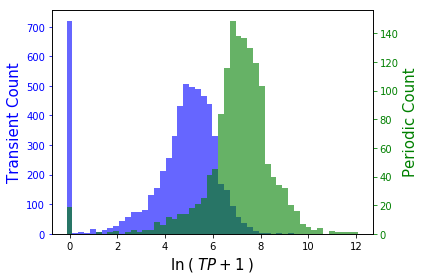

In [34]:
colors = ['b','g']

#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([y3, y4], color=colors)
n, bins, patches = ax1.hist([y3,y4],bins=50)
ax1.cla() 

#plots the histogram data
width = (bins[1] - bins[0])
bins_shifted = bins
ax1.bar(bins[:-1], n[0], width, color=colors[0],alpha = .6,label="kilonova")
ax2.bar(bins[:-1], n[1], width, color=colors[1],alpha = .6, label="non-kilonova")

#finishes the plot
ax1.set_ylabel("Transient Count", color=colors[0],fontsize=15)      
ax2.set_ylabel("Periodic Count", color=colors[1],fontsize=15)
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.set_xlabel("$\ln{\;(\;TP+1\;)}$",fontsize=15)
fig.savefig("distribution_of_transient_probability_1yr")
plt.tight_layout()
plt.show()